<a href="https://colab.research.google.com/github/imihawk77/Insurance-payments/blob/main/Insurance_payments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean_Squared_Error: 24099540.184729412
R2_Score: 0.8326553543910427


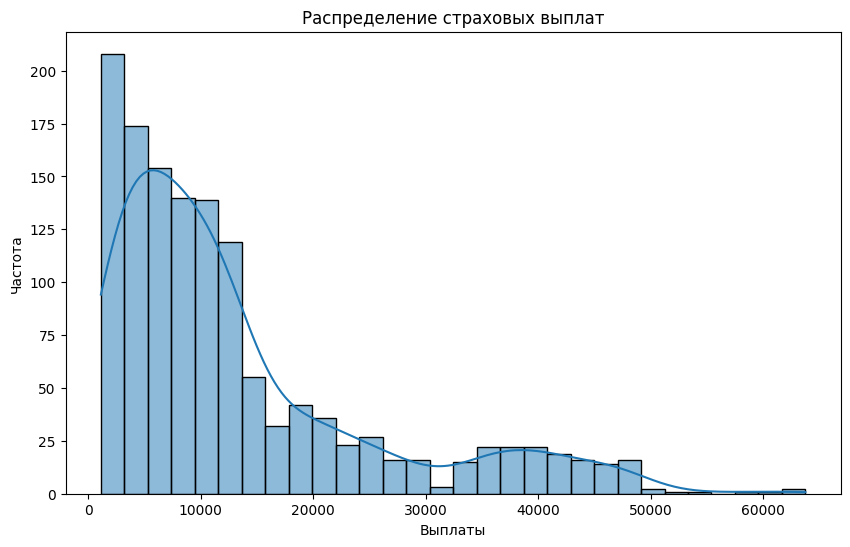

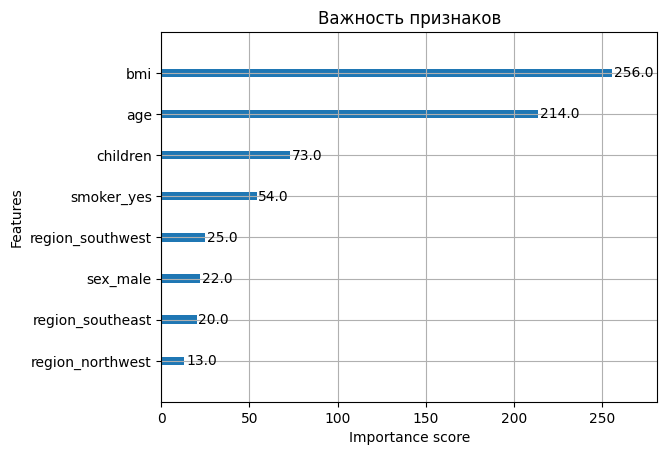

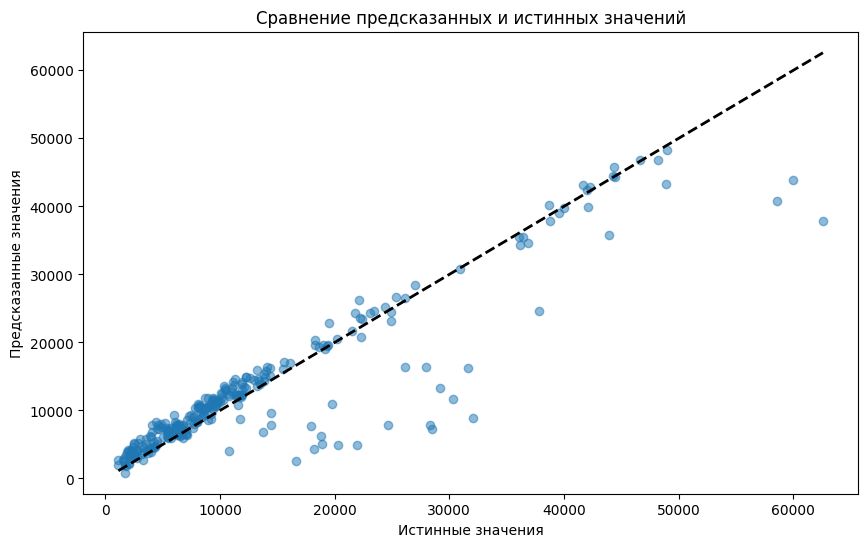

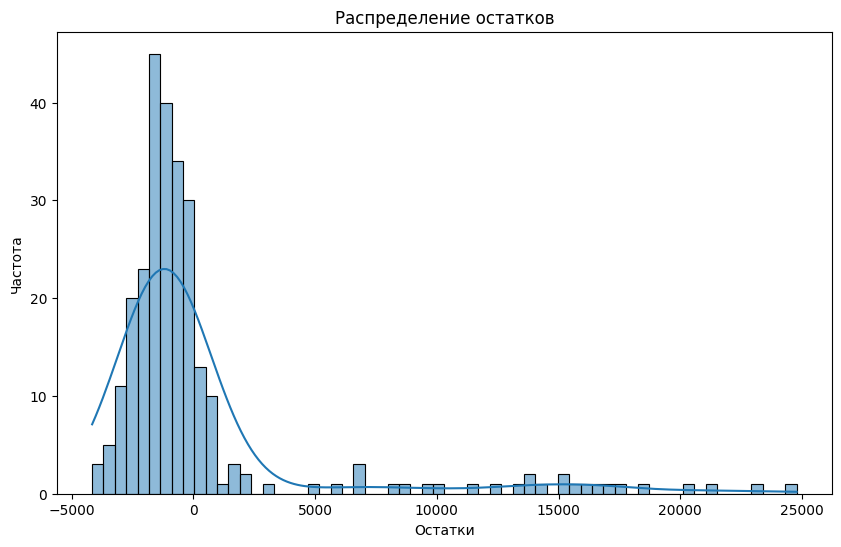

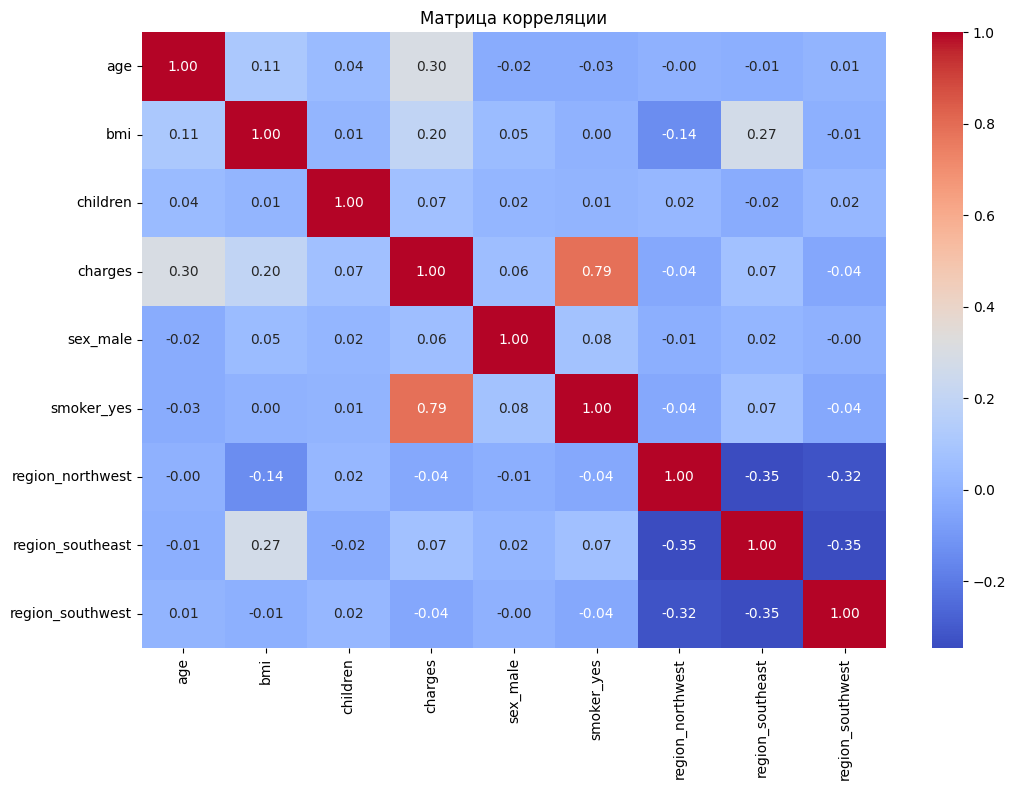

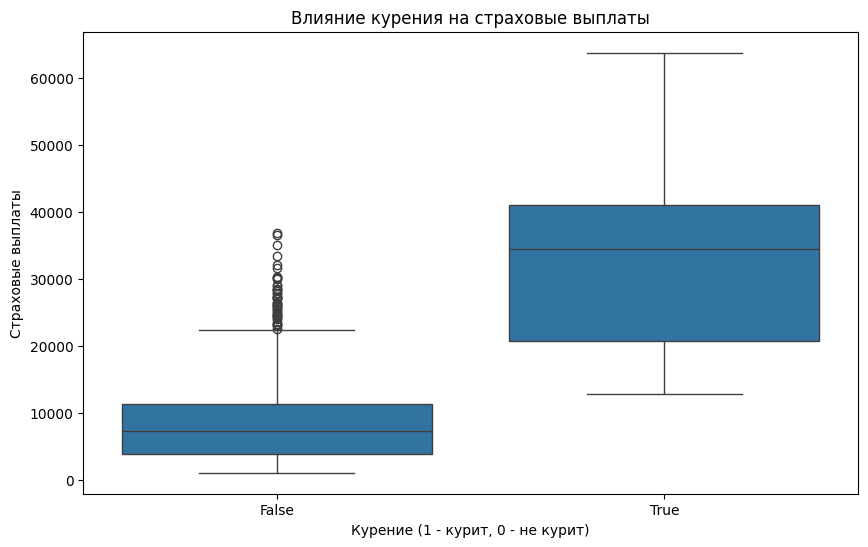

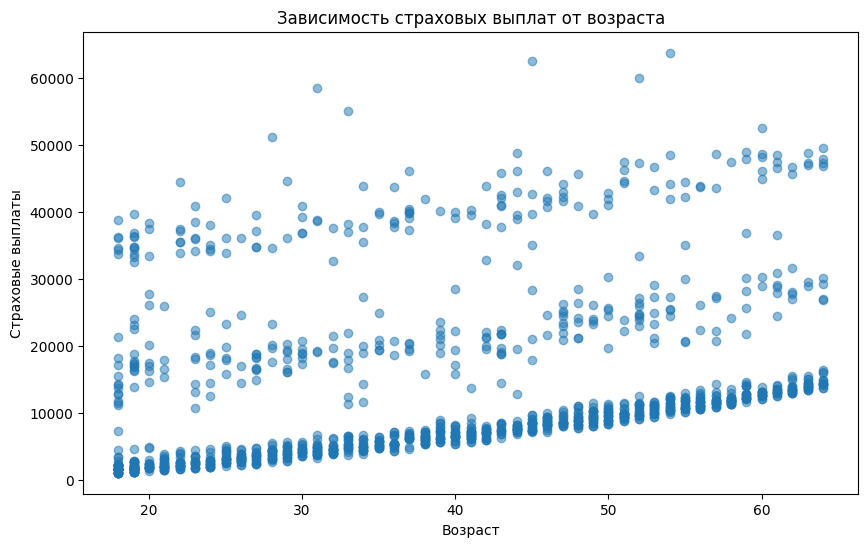

Корреляция между возрастом и страховыми выплатами: 0.30


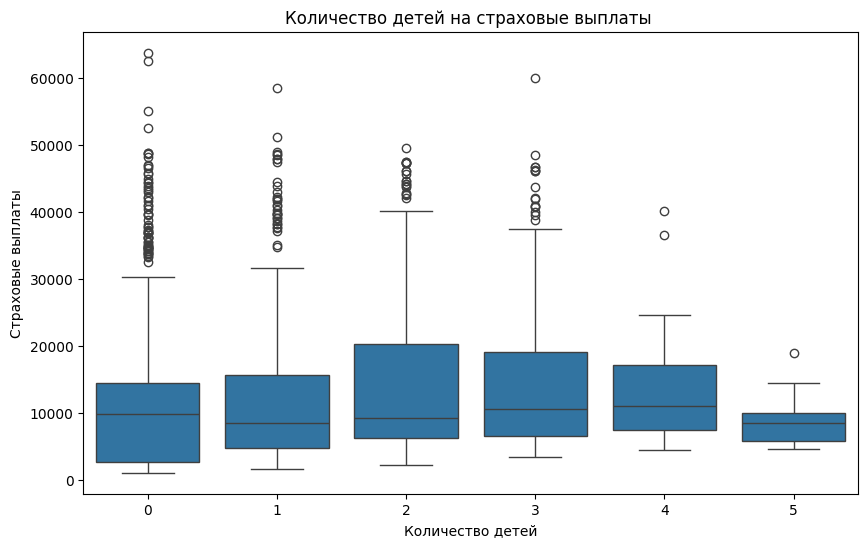

In [ ]:
import io
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Загрузка данных
df = pd.read_csv(io.BytesIO(uploaded['insurance.csv']))

# 2. Анализ данных
df.shape
df.head()
df.isnull().sum()

# 3. Преобразование категориальных данных в числовой формат
df = pd.get_dummies(df, drop_first=True)

# 4. Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df.drop('charges', axis=1), df['charges'], test_size=0.2, random_state=12)

# 5. Обучение модели
model  = XGBRegressor(objective='reg:squarederror',  n_estimators=100, learning_rate=0.1, max_depth=3, random_state=12)
model.fit(X_train, y_train)

# 6. Оценка качества регресионной модели
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean_Squared_Error: {mse}")
print(f"R2_Score: {r2}")

# 7. Визуализация
plt.figure(figsize=(10, 6))
sn.histplot(df['charges'], kde=True)
plt.title ('Распределение страховых выплат')
plt.xlabel('Выплаты')
plt.ylabel('Частота')
plt.show()

# 7.1 Наиболее важные признаки модели
xgb.plot_importance(model, importance_type='weight', max_num_features=10)
plt.title('Важность признаков')
plt.show()

# 7.2 Сравнение предсказанных значений с истинными
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Сравнение предсказанных и истинных значений')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

# 7.3 Распределение ошибок модели
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sn.histplot(residuals, kde=True)
plt.title('Распределение остатков')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.show()

# 8 Вычисление кореляционной матрицы для показа взаимосвязи между столбцами
correlation_matrix = df.corr()

# 8.1 Визуализация матрица корреляции
plt.figure(figsize=(12, 8))
sn.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

# 8.2 Визуализация влияния курения на страховые выплаты
plt.figure(figsize=(10, 6))
sn.boxplot(x='smoker_yes', y='charges', data=df)
plt.title('Влияние курения на страховые выплаты')
plt.xlabel('Курение (1 - курит, 0 - не курит)')
plt.ylabel('Страховые выплаты')
plt.show()

# 8.3 Визуализация корреляции возраста на страховые выплаты
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['charges'], alpha=0.5)
plt.title('Зависимость страховых выплат от возраста')
plt.xlabel('Возраст')
plt.ylabel('Страховые выплаты')
plt.show()

# 8.4 Вычисление корреляции между возрастом и выплатами
age_charges_correlation = df['age'].corr(df['charges'])
print(f"Корреляция между возрастом и страховыми выплатами: {age_charges_correlation:.2f}")

# 8.5 Влияние количества детей на страховые выплаты
plt.figure(figsize=(10, 6))
sn.boxplot(x='children', y='charges', data=df)
plt.title('Количество детей на страховые выплаты ')
plt.xlabel('Количество детей')
plt.ylabel('Страховые выплаты')
plt.show()



**Вывод**: Факторы наиболее сильно влияющие на страховые выплаты: BMI( Индекса массы) люди с более высокой массой тела платят больше, Age(возраст) оказывается существенное влияние на выплаты кореляция составляет 0,30, Smoker( курильщик) для курящих страховые выплаты выше чем для некурящих, количество детей не оказывает существенного влияния на страховые выплаты, в связи с тем, что в дети есть не у всех застрахованных.